In [1]:
!pip install pandas numpy keras scikit-learn openpyxl tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 9.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
!pip install --upgrade --force-reinstall numpy


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 71.3 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  7 16:02:02 2021

@author: epinsky
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""

# install yfinance version 0.1.62
#   !pip install yfinance==0.1.62
# run this  
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
    df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday',
                    'Week_Number', 'Year_Week', 'Open',
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='spy'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2000-10-01', end_date='2024-06-30',
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)



  Using cached yfinance-0.1.62-py2.py3-none-any.whl
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.40
    Uninstalling yfinance-0.2.40:
      Successfully uninstalled yfinance-0.2.40


AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  7 16:02:02 2021

@author: epinsky
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""

# install yfinance version 0.1.62
#   !pip install yfinance==0.1.62
# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
        df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['return'] = df['Adj Close'].pct_change()
        df['return'].fillna(0, inplace = True)
        df['date'] = df.index
        df['date'] = pd.to_datetime(df['date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday',
                    'Week_Number', 'Year_Week', 'Open',
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='spy'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2000-10-01', end_date='2024-06-30',
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)



[*********************100%%**********************]  1 of 1 completed

'Date'
'NoneType' object has no attribute 'to_csv'
failed to get Yahoo stock data for ticker:  spy


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  7 16:02:02 2021

@author: epinsky
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""

# install yfinance version 0.1.62
#   !pip install yfinance==0.1.62
# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
        df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday',
                    'Week_Number', 'Year_Week', 'Open',
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='spyg'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2000-10-01', end_date='2024-06-30',
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)



[*********************100%%**********************]  1 of 1 completed


read  5848  lines of data for ticker:  spyg
wrote 5848 lines to file: /content/spyg.csv


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  7 16:02:02 2021

@author: epinsky
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""

# install yfinance version 0.1.62
#   !pip install yfinance==0.1.62
# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
        df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday',
                    'Week_Number', 'Year_Week', 'Open',
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='spyv'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2000-10-01', end_date='2024-06-30',
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)



[*********************100%%**********************]  1 of 1 completed


read  5848  lines of data for ticker:  spyv
wrote 5848 lines to file: /content/spyv.csv


In [ ]:
import os

# 创建新的文件夹
folder_path = '/content/data'
os.makedirs(folder_path, exist_ok=True)

# 切换到新创建的文件夹
os.chdir(folder_path)


In [17]:
pwd

'/usr3/graduate/xz0224'

In [ ]:
import gc


In [ ]:
import pandas as pd

# 设置文件路径
file_path_spyv = '/content/spyv.csv'
file_path_spyg = '/content/spyg.csv'
file_path_spy = '/content/spy.csv'

# 读取数据
data_spyv = pd.read_csv(file_path_spyv)
data_spyg = pd.read_csv(file_path_spyg)
data_spy = pd.read_csv(file_path_spy)

# 选择并重命名所需的列
data_spyv = data_spyv[['Date', 'Close', 'Return']].rename(columns={'Date': 'date', 'Close': 'price', 'Return': 'return'})
data_spyg = data_spyg[['Date', 'Close', 'Return']].rename(columns={'Date': 'date', 'Close': 'price', 'Return': 'return'})
data_spy = data_spy[['Date', 'Close', 'Return']].rename(columns={'Date': 'date', 'Close': 'price', 'Return': 'return'})

# 确保日期列格式为datetime
data_spyv['date'] = pd.to_datetime(data_spyv['date'])
data_spyg['date'] = pd.to_datetime(data_spyg['date'])
data_spy['date'] = pd.to_datetime(data_spy['date'])

data_spyv.to_csv('/content/spyv.csv', index=False)
data_spyg.to_csv('/content/spyg.csv', index=False)
data_spy.to_csv('/content/spy.csv', index=False)



#set_1

In [15]:
!pip uninstall numpy -y
!pip install numpy==1.23.5 --user --no-cache-dir


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 290.4 MB/s eta 0:00:00a 0:00:01


In [16]:
!pip install empyrical
import empyrical

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'numpy.char'

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras import backend as K

# 假设 X_train 和 y_train 已经定义，并且 X_train 是字符串序列



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 加载数据
spy_growth = pd.read_csv('/content/spyg.csv')
spy_value = pd.read_csv('/content/spyv.csv')
sp500 = pd.read_csv('/content/spy.csv')

In [ ]:
# 数据预处理
spy_growth['date'] = pd.to_datetime(spy_growth['date'])
spy_value['date'] = pd.to_datetime(spy_value['date'])
spy_growth['return_label'] = spy_growth['return'].apply(lambda x: '+' if x > 0 else '-')
spy_value['return_label'] = spy_value['return'].apply(lambda x: '+' if x > 0 else '-')

# 构建特征
def create_label_sequence(data):
    sequences = []
    for i in range(len(data)):
        if i >= 9:  # 确保有足够的数据来创建10天的序列
            sequence = ''.join(data['return_label'][i-9:i+1])
            sequences.append(sequence)
        else:
            sequences.append(None)  # 对于序列开始的部分，填充None
    return sequences

spy_growth['feature'] = create_label_sequence(spy_growth)
spy_value['feature'] = create_label_sequence(spy_value)

In [ ]:
results_df = pd.read_csv('/content/drive/MyDrive/research/investment_results_final(2006)(5 years).csv')

# 从 DataFrame 中提取 dates 和 values
dates = pd.to_datetime(results_df['Date']).tolist()
values = results_df['Investment_Value'].tolist()

Final investment amount: 1079.3140672077689
Final Oracle investment amount: 15440977.550334442


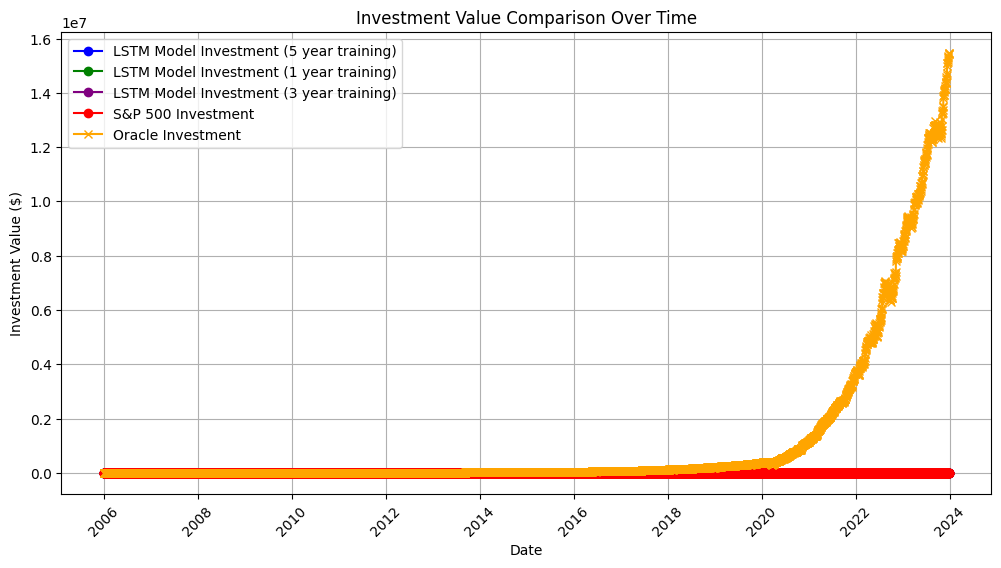

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.read_csv('/content/drive/MyDrive/research/investment_results_final(2006)(5 years).csv')

# 从 DataFrame 中提取 dates 和 values
dates = pd.to_datetime(results_df['Date']).tolist()
values = results_df['Investment_Value'].tolist()

# 读取数据并设置日期格式
sp500 = pd.read_csv('/content/spy.csv')
sp500['date'] = pd.to_datetime(sp500['date'])
# 处理 investment_results_1
file_path_1 = '/content/drive/MyDrive/research/investment_results_final(2006)(1 years).csv'
investment_results_1 = pd.read_csv(file_path_1)

investment_results_1['Date'] = pd.to_datetime(investment_results_1['Date'])
dates_1 = investment_results_1['Date']
values_1 = investment_results_1['Investment_Value']


file_path_2 = '/content/drive/MyDrive/research/investment_results_final(2006)(3 years).csv'
investment_results_2 = pd.read_csv(file_path_2)

investment_results_2['Date'] = pd.to_datetime(investment_results_2['Date'])
dates_2 = investment_results_2['Date']
values_2 = investment_results_2['Investment_Value']
# 设置时间范围
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2024-06-30')

# 初始化投资金额
initial_investment = 200
sp500_values = [200]  # 存储每日的投资金额
valid_dates = [start_date]  # 用于绘图的有效日期

# 模拟投资过程
current_value = initial_investment
for date in pd.date_range(start=start_date, end=end_date):
    # 检查日期是否在sp500数据中
    if date in sp500['date'].values:
        daily_return = sp500.loc[sp500['date'] == date, 'return'].values[0]
        current_value *= (1 + daily_return)
        sp500_values.append(current_value)
        valid_dates.append(date)  # 仅添加存在于数据中的日期

print(f"Final investment amount: {current_value}")




# 确保日期是datetime类型
spy_growth['date'] = pd.to_datetime(spy_growth['date'])
spy_value['date'] = pd.to_datetime(spy_value['date'])

# 初始化投资金额
initial_investment = 200
oracle_values = [initial_investment]  # 存储每日的投资金额
oracle_dates = [pd.to_datetime('2000-01-01')]  # 用于绘图的有效日期

# 模拟Oracle投资过程
current_value = initial_investment
for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if date in spy_growth['date'].values and date in spy_value['date'].values:
        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]
        # Oracle选择收益率更高的投资
        current_value *= (1 + max(growth_rate, value_rate))
        oracle_values.append(current_value)
        oracle_dates.append(date)

print(f"Final Oracle investment amount: {current_value}")


# 绘图
plt.figure(figsize=(12, 6))

# 绘制之前的投资策略
plt.plot(dates, values, marker='o', linestyle='-', color='b', label='LSTM Model Investment (5 year training)')
plt.plot(dates_1, values_1, marker='o', linestyle='-', color='g', label='LSTM Model Investment (1 year training)')
plt.plot(dates_2, values_2, marker='o', linestyle='-', color='purple', label='LSTM Model Investment (3 year training)')
plt.plot(valid_dates, sp500_values, marker='o', linestyle='-', color='r', label='S&P 500 Investment')

# 绘制Oracle投资策略
plt.plot(oracle_dates, oracle_values, marker='x', linestyle='-', color='orange', label='Oracle Investment')


plt.title('Investment Value Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Final Oracle investment amount: 7720488.775167221


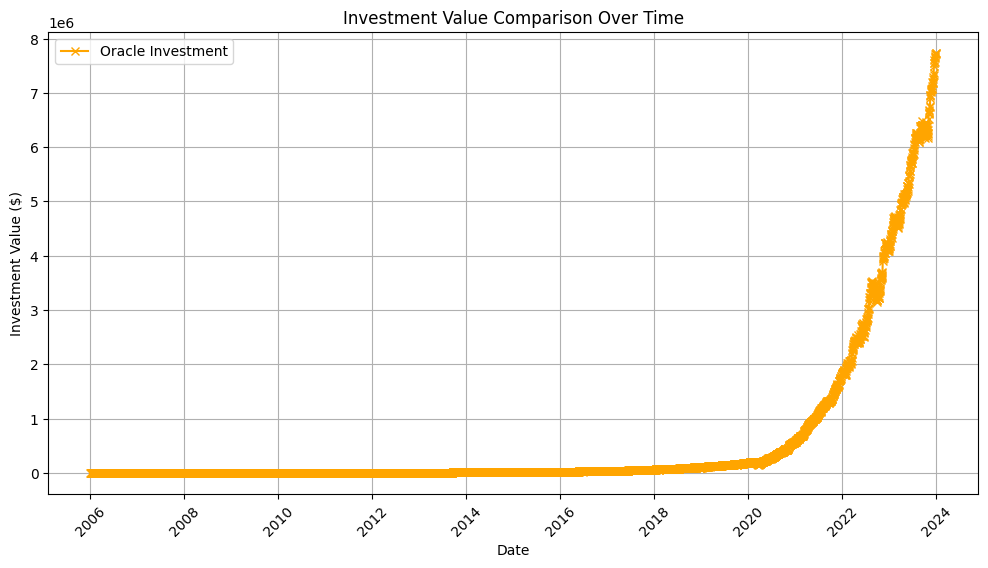

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd





# 确保日期是datetime类型
spy_growth['date'] = pd.to_datetime(spy_growth['date'])
spy_value['date'] = pd.to_datetime(spy_value['date'])

# 初始化投资金额
initial_investment = 100
oracle_values = [initial_investment]  # 存储每日的投资金额
oracle_dates = [pd.to_datetime('2000-01-01')]  # 用于绘图的有效日期

# 模拟Oracle投资过程
current_value = initial_investment
for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if date in spy_growth['date'].values and date in spy_value['date'].values:
        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]
        # Oracle选择收益率更高的投资
        current_value *= (1 + max(growth_rate, value_rate))
        oracle_values.append(current_value)
        oracle_dates.append(date)

print(f"Final Oracle investment amount: {current_value}")


# 绘图
plt.figure(figsize=(12, 6))



# 绘制Oracle投资策略
plt.plot(oracle_dates, oracle_values, marker='x', linestyle='-', color='orange', label='Oracle Investment')


plt.title('Investment Value Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
results_df = pd.read_csv('/content/drive/MyDrive/research/investment_results_final(2006)(5 years).csv')

# 从 DataFrame 中提取 dates 和 values
dates = pd.to_datetime(results_df['Date']).tolist()
values = results_df['Investment_Value'].tolist()

# 读取数据并设置日期格式
sp500 = pd.read_csv('/content/spy.csv')
sp500['date'] = pd.to_datetime(sp500['date'])
# 处理 investment_results_1
file_path_1 = '/content/drive/MyDrive/research/investment_results_final(2006)(1 years).csv'
investment_results_1 = pd.read_csv(file_path_1)

investment_results_1['Date'] = pd.to_datetime(investment_results_1['Date'])
dates_1 = investment_results_1['Date']
values_1 = investment_results_1['Investment_Value']


file_path_2 = '/content/drive/MyDrive/research/investment_results_final(2006)(3 years).csv'

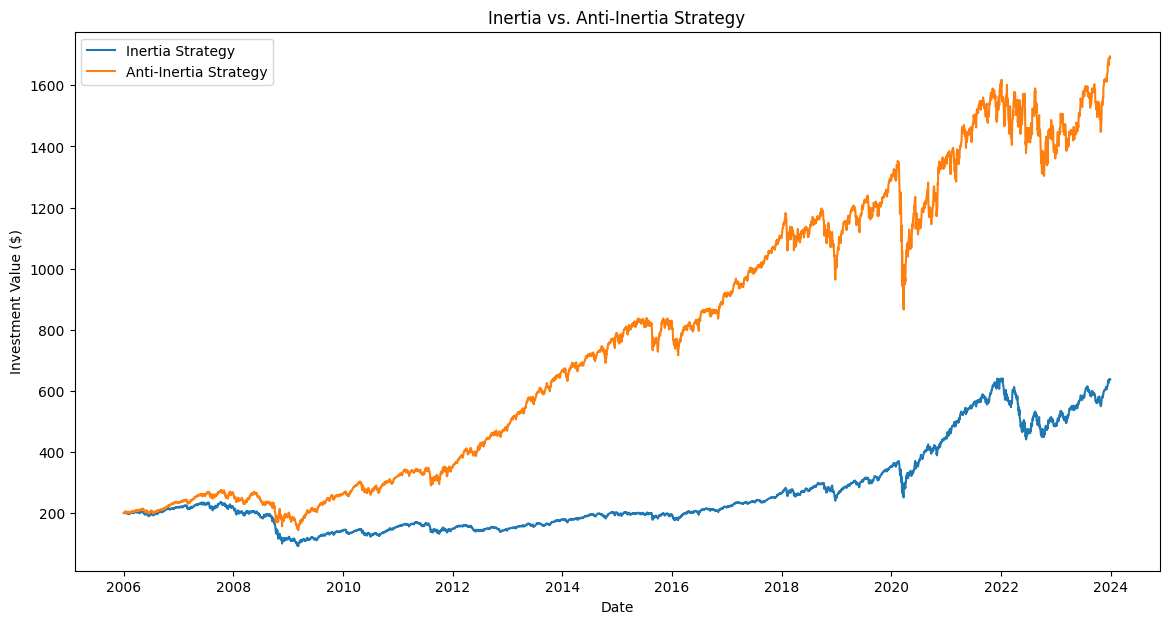

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设 spy_growth 和 spy_value 已经被正确加载并且日期格式已经是 datetime
# 示例代码，需要根据你的实际数据路径进行调整
# spy_growth = pd.read_csv('path_to_spy_growth.csv')
# spy_value = pd.read_csv('path_to_spy_value.csv')

# 确保日期是 datetime 类型
# spy_growth['date'] = pd.to_datetime(spy_growth['date'])
# spy_value['date'] = pd.to_datetime(spy_value['date'])

# 初始化投资金额
initial_investment = 200

# 初始化存储投资值的列表和对应的日期列表
inertia_values = [initial_investment]
anti_inertia_values = [initial_investment]
inertia_dates = [pd.to_datetime('2000-01-01')]
anti_inertia_dates = [pd.to_datetime('2000-01-01')]

# 初始化投资决策
last_decision = None  # None, 'growth', 'value'

for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if date in spy_growth['date'].values and date in spy_value['date'].values:
        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]

        # 根据前一天的决策来决定今天的投资
        if last_decision == 'growth':
            current_value_inertia = inertia_values[-1] * (1 + growth_rate)
            current_value_anti = anti_inertia_values[-1] * (1 + value_rate)
        elif last_decision == 'value':
            current_value_inertia = inertia_values[-1] * (1 + value_rate)
            current_value_anti = anti_inertia_values[-1] * (1 + growth_rate)
        else:  # 第一天没有前一天的决策，可以选择默认策略或是跳过
            current_value_inertia = initial_investment
            current_value_anti = initial_investment

        inertia_values.append(current_value_inertia)
        anti_inertia_values.append(current_value_anti)
        inertia_dates.append(date)  # 仅记录实际有操作的日期
        anti_inertia_dates.append(date)

        # 更新昨天的决策为今天的决策
        last_decision = 'growth' if growth_rate > value_rate else 'value'

# 绘图比较两种策略
plt.figure(figsize=(14, 7))

# 绘制惯性策略
plt.plot(inertia_dates, inertia_values, label='Inertia Strategy')

# 绘制反惯性策略
plt.plot(anti_inertia_dates, anti_inertia_values, label='Anti-Inertia Strategy')

plt.title('Inertia vs. Anti-Inertia Strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()


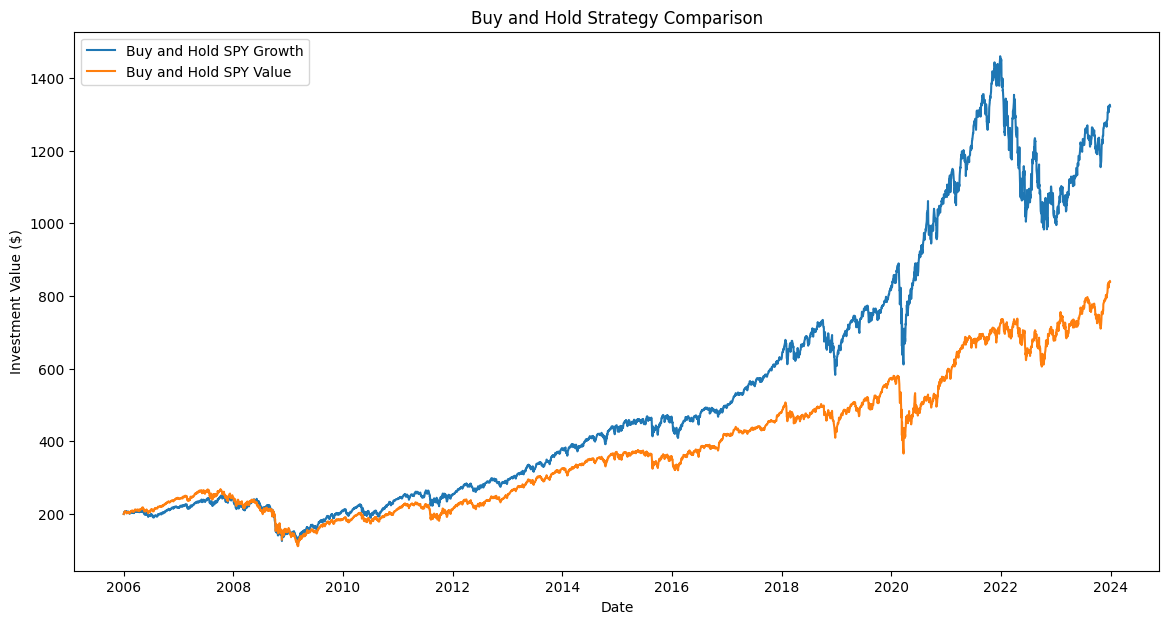

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 初始化投资金额
initial_investment = 200



# 初始化存储投资值的列表
buy_hold_growth_values = [initial_investment]
buy_hold_value_values = [initial_investment]

# 初始化日期列表
buy_hold_dates = [pd.to_datetime('2000-01-01')]

# 遍历每个日期，计算投资价值
for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if date in spy_growth['date'].values and date in spy_value['date'].values:
        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]

        # 计算'buy and hold'策略的投资价值
        current_value_growth = buy_hold_growth_values[-1] * (1 + growth_rate)
        current_value_value = buy_hold_value_values[-1] * (1 + value_rate)

        buy_hold_growth_values.append(current_value_growth)
        buy_hold_value_values.append(current_value_value)
        buy_hold_dates.append(date)

# 绘图比较两种策略
plt.figure(figsize=(14, 7))

# 绘制'buy and hold spy growth'策略
plt.plot(buy_hold_dates, buy_hold_growth_values, label='Buy and Hold SPY Growth')

# 绘制'buy and hold spy value'策略
plt.plot(buy_hold_dates, buy_hold_value_values, label='Buy and Hold SPY Value')

# 添加之前的策略作为参考
# 确保你有相应的数据和变量定义来绘制这些曲线
# plt.plot(inertia_dates, inertia_values, label='Inertia Strategy')
# plt.plot(anti_inertia_dates, anti_inertia_values, label='Anti-Inertia Strategy')

plt.title('Buy and Hold Strategy Comparison')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()



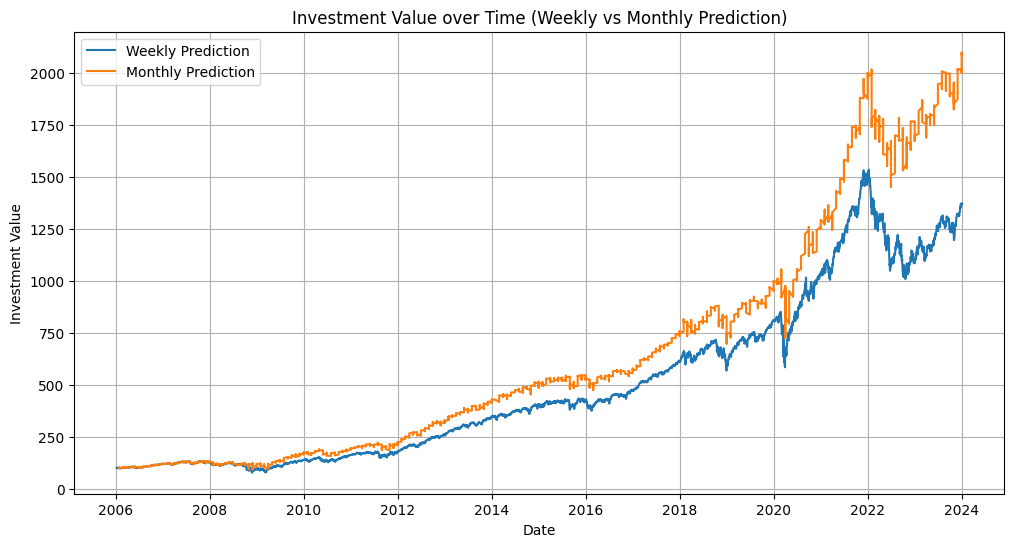

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取已经生成的数据
file_path_week = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_week).xlsx'
file_path_month = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_month).xlsx'

# 加载数据
week_data = pd.read_excel(file_path_week)
month_data = pd.read_excel(file_path_month)

# 移动日期到周末和月末
week_data['Date'] = pd.to_datetime(week_data['Date']) + pd.DateOffset(days=6)
month_data['Date'] = pd.to_datetime(month_data['Date']) + pd.offsets.MonthEnd(0)

# 绘制图表
plt.figure(figsize=(12, 6))
plt.plot(week_data['Date'], week_data['Investment_Value'], label='Weekly Prediction')
plt.plot(month_data['Date'], month_data['Investment_Value'], label='Monthly Prediction')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.title('Investment Value over Time (Weekly vs Monthly Prediction)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import datetime

# 假设所有的日期和价值变量都已经被正确定义
# 确保日期变量是datetime.date或datetime.datetime对象

def filter_fridays(dates, values):
    """筛选每周五的日期和对应的值"""
    friday_dates = [date for date in dates if date.weekday() == 4]
    friday_values = [value for date, value in zip(dates, values) if date.weekday() == 4]
    return friday_dates, friday_values

# 绘图比较四种策略
plt.figure(figsize=(14, 7))

# 对每个策略筛选每周五的数据并绘制

# 筛选并绘制惯性策略的每周五数据
friday_dates, friday_values = filter_fridays(inertia_dates, inertia_values)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='Max Strategy')

# 筛选并绘制反惯性策略的每周五数据
friday_dates, friday_values = filter_fridays(anti_inertia_dates, anti_inertia_values)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='Min Strategy')

# 筛选并绘制购买并持有SPY成长策略的每周五数据
friday_dates, friday_values = filter_fridays(buy_hold_dates, buy_hold_growth_values)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='Buy and Hold SPY Growth')

# 筛选并绘制购买并持有SPY价值策略的每周五数据
friday_dates, friday_values = filter_fridays(buy_hold_dates, buy_hold_value_values)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='Buy and Hold SPY Value')

plt.title('Performance Comparison of Investment Strategies from a $100 (Fridays Only)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.show()

# March 10

In [ ]:
def decide_investment_strategy(spy_growth, spy_value, date, days):
    end_date = date
    start_date = end_date - pd.Timedelta(days=days)

    # 过滤出过去几天的数据
    past_growth = spy_growth[(spy_growth['date'] >= start_date) & (spy_growth['date'] < end_date)]
    past_value = spy_value[(spy_value['date'] >= start_date) & (spy_value['date'] < end_date)]

    # 计算增长和价值的天数
    growth_days = (past_growth['return'] > past_value['return']).sum()
    value_days = (past_growth['return'] < past_value['return']).sum()

    # 根据多数原则决定
    if growth_days > value_days:
        return 'growth'
    else:
        return 'value'
initial_investment=100

In [ ]:
inertia_values_1d, anti_inertia_values_1d = [initial_investment], [initial_investment]
inertia_values_3d, anti_inertia_values_3d = [initial_investment], [initial_investment]
inertia_values_5d, anti_inertia_values_5d = [initial_investment], [initial_investment]

inertia_dates_1d, anti_inertia_dates_1d = [pd.to_datetime('2000-01-01')], [pd.to_datetime('2000-01-01')]
inertia_dates_3d, anti_inertia_dates_3d = [pd.to_datetime('2000-01-01')], [pd.to_datetime('2000-01-01')]
inertia_dates_5d, anti_inertia_dates_5d = [pd.to_datetime('2000-01-01')], [pd.to_datetime('2000-01-01')]

In [ ]:
investment_strategies = ['1d', '3d', '5d']
investment_values = {f'{strategy}_inertia': [initial_investment] for strategy in investment_strategies}
investment_values.update({f'{strategy}_anti': [initial_investment] for strategy in investment_strategies})
dates = {strategy: [pd.to_datetime('2000-01-01')] for strategy in investment_strategies}


In [ ]:

for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if date in spy_growth['date'].values and date in spy_value['date'].values:
        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]

        for days in [1, 3, 5]:
            strategy_key = f'{days}d'
            decision = decide_investment_strategy(spy_growth, spy_value, date, days)

            if decision == 'growth':
                current_value_inertia = investment_values[f'{strategy_key}_inertia'][-1] * (1 + growth_rate)
                current_value_anti = investment_values[f'{strategy_key}_anti'][-1] * (1 + value_rate)
            else:
                current_value_inertia = investment_values[f'{strategy_key}_inertia'][-1] * (1 + value_rate)
                current_value_anti = investment_values[f'{strategy_key}_anti'][-1] * (1 + growth_rate)

            investment_values[f'{strategy_key}_inertia'].append(current_value_inertia)
            investment_values[f'{strategy_key}_anti'].append(current_value_anti)
            dates[strategy_key].append(date)

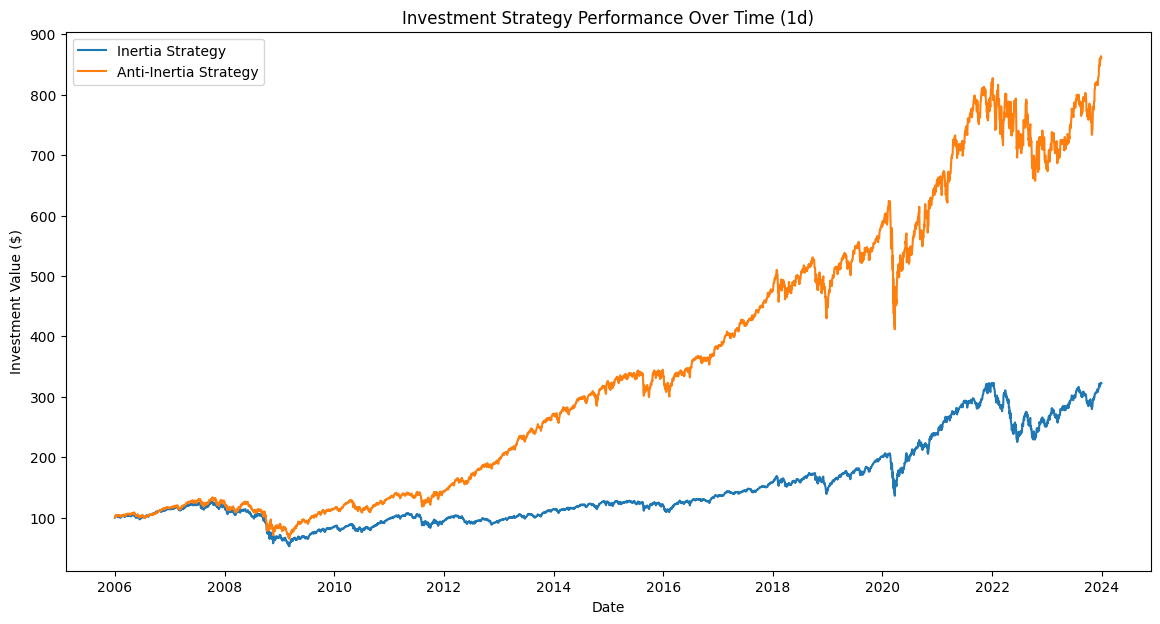

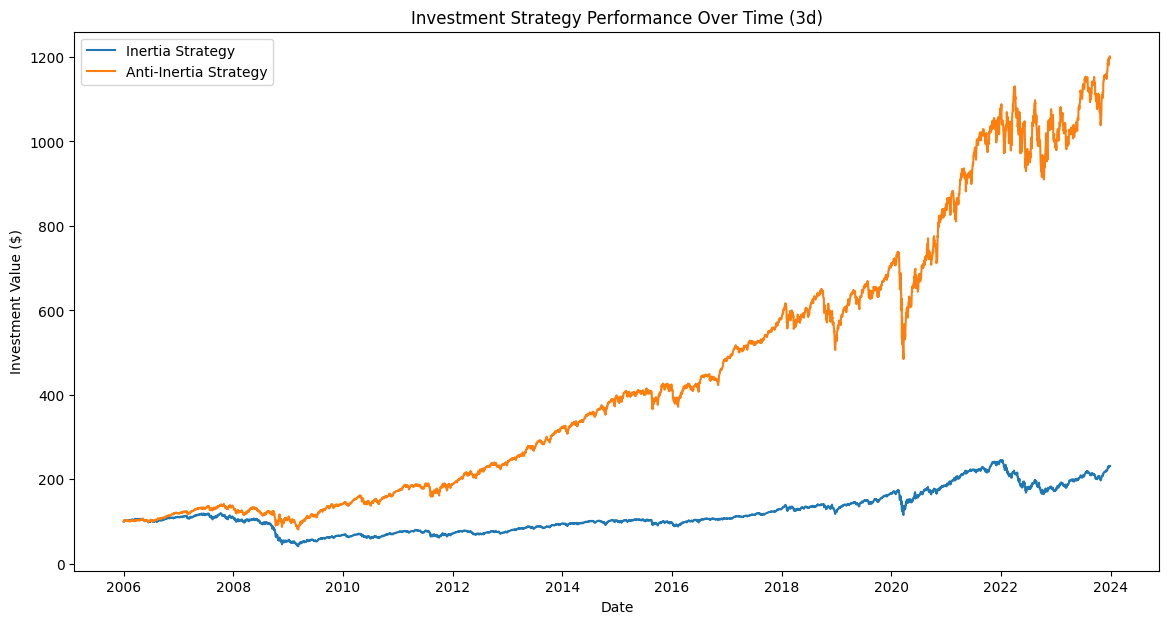

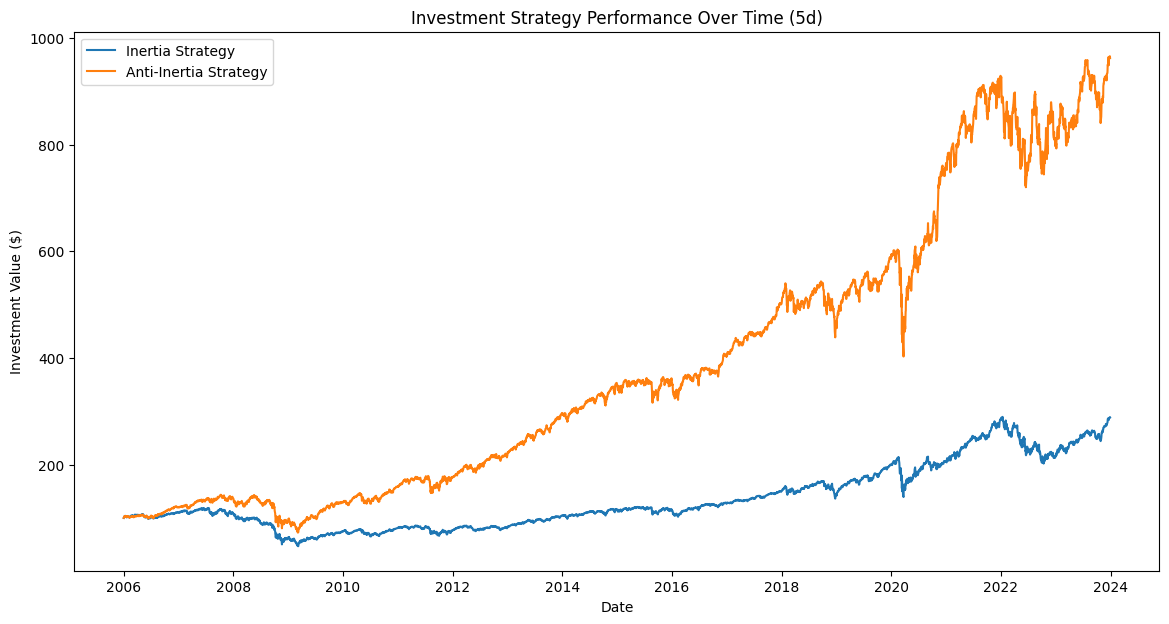

In [ ]:

# 绘制所有六个图表
for strategy in investment_strategies:
    plt.figure(figsize=(14, 7))
    plt.plot(dates[strategy], investment_values[f'{strategy}_inertia'], label='Inertia Strategy')
    plt.plot(dates[strategy], investment_values[f'{strategy}_anti'], label='Anti-Inertia Strategy')
    plt.title(f'Investment Strategy Performance Over Time ({strategy})')
    plt.xlabel('Date')
    plt.ylabel('Investment Value ($)')
    plt.legend()
    plt.show()

# wong

In [ ]:
import csv
from datetime import datetime

# 假设 investment_values 和 dates 包含了之前计算的数据
# 这里简化了数据结构以适应示例代码
investment_strategies = ['1d', '3d', '5d']
strategy_names = [f'{strategy}_inertia' for strategy in investment_strategies] + [f'{strategy}_anti' for strategy in investment_strategies]

# 指定文件名
filename_values = 'investment_strategy_values.csv'

# CSV文件的头部
years = sorted(set([date.year for strategy in investment_strategies for date in dates[strategy]]))
headers_values = ['Strategy Name'] + [str(year) for year in years]

# 写入年终价值CSV
with open(filename_values, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers_values)
    for strategy_name in strategy_names:
        # 假设你可以根据策略名从 investment_values 中获取相应的值列表
        # 这里简化处理，直接使用投资值列表
        # 确保 investment_values 中的值已经按照日期排序
        strategy_values = investment_values[strategy_name]
        strategy_dates = dates[strategy_name.replace('_inertia', '').replace('_anti', '')]

        # 对每个年份找到年末的投资价值
        year_end_values = []
        for year in years:
            year_values = [value for value, date in zip(strategy_values, strategy_dates) if date.year == year]
            if year_values:
                year_end_values.append(year_values[-1])
            else:
                year_end_values.append('')

        row = [strategy_name] + year_end_values
        writer.writerow(row)

print(f'Investment Strategy Values saved to {filename_values}')

Investment Strategy Values saved to investment_strategy_values.csv


In [ ]:
import csv
from datetime import datetime

# 假设 investment_values 和 dates 包含了之前计算的数据
# 这里简化了数据结构以适应示例代码
investment_strategies = ['1d', '3d', '5d']
strategy_names = [f'{strategy}_inertia' for strategy in investment_strategies] + [f'{strategy}_anti' for strategy in investment_strategies]

# 指定文件名
filename_values = 'investment_strategy_values.csv'

# CSV文件的头部
years = sorted(set([date.year for strategy in investment_strategies for date in dates[strategy]]))
headers_values = ['Strategy Name'] + [str(year) for year in years]

# 写入年终价值CSV
with open(filename_values, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers_values)
    for strategy_name in strategy_names:
        # 假设你可以根据策略名从 investment_values 中获取相应的值列表
        # 这里简化处理，直接使用投资值列表
        # 确保 investment_values 中的值已经按照日期排序
        strategy_values = investment_values[strategy_name]
        strategy_dates = dates[strategy_name.replace('_inertia', '').replace('_anti', '')]

        # 对每个年份找到年末的投资价值
        year_end_values = []
        for year in years:
            year_values = [value for value, date in zip(strategy_values, strategy_dates) if date.year == year]
            if year_values:
                year_end_values.append(year_values[-1])
            else:
                year_end_values.append('')

        row = [strategy_name] + year_end_values
        writer.writerow(row)

print(f'Investment Strategy Values saved to {filename_values}')


Investment Strategy Values saved to investment_strategy_values.csv


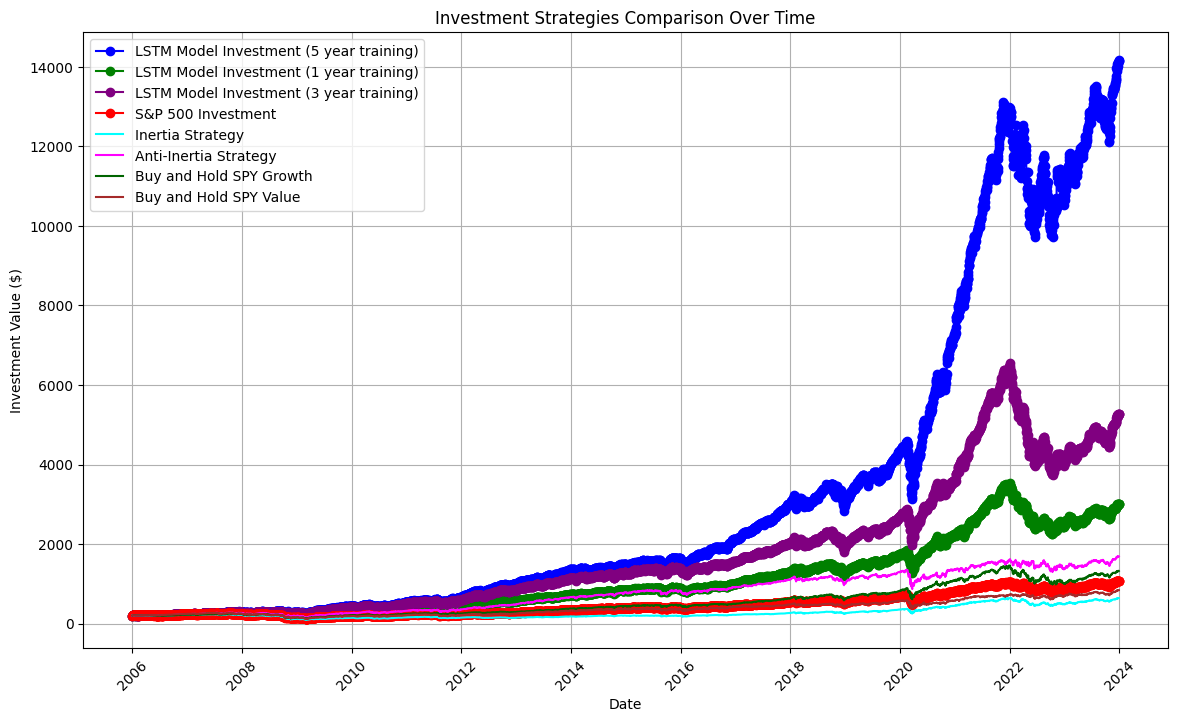

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 初始化绘图
plt.figure(figsize=(14, 8))

# 第一个图表：LSTM Model Investment 和 S&P 500 Investment
plt.plot(dates, values, marker='o', color='blue', label='LSTM Model Investment (5 year training)')
plt.plot(dates_1, values_1, marker='o',color='green', label='LSTM Model Investment (1 year training)')
plt.plot(dates_2, values_2, marker='o',  color='purple', label='LSTM Model Investment (3 year training)')
plt.plot(valid_dates, sp500_values, marker='o', color='red', label='S&P 500 Investment')


# 第二个图表：Inertia 和 Anti-Inertia 策略
plt.plot(inertia_dates, inertia_values, color='cyan', label='Inertia Strategy')
plt.plot(anti_inertia_dates, anti_inertia_values, color='magenta', label='Anti-Inertia Strategy')

# 第三个图表：Buy and Hold 策略
plt.plot(buy_hold_dates, buy_hold_growth_values, color='darkgreen', label='Buy and Hold SPY Growth')
plt.plot(buy_hold_dates, buy_hold_value_values,  color='brown', label='Buy and Hold SPY Value')

plt.title('Investment Strategies Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


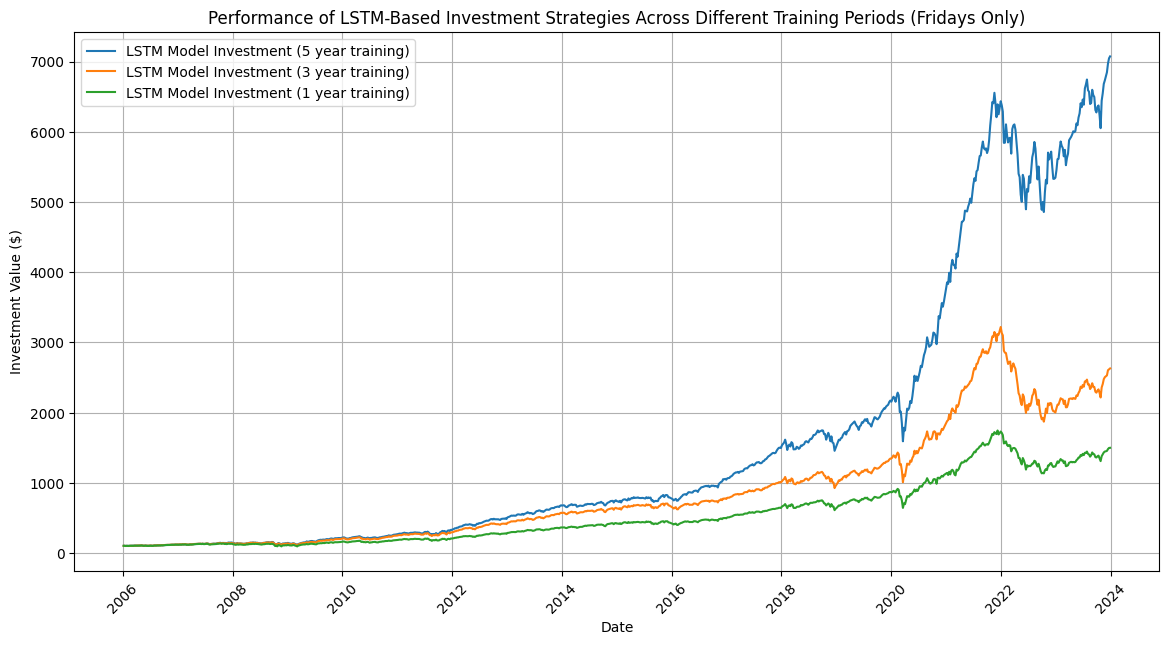

In [ ]:
import matplotlib.pyplot as plt
import datetime

# 假设所有的日期和价值变量都已经被正确定义
# 确保日期变量是datetime.date或datetime.datetime对象

def filter_fridays(dates, values):
    """筛选每周五的日期和对应的值"""
    friday_dates = [date for date in dates if date.weekday() == 4]
    friday_values = [value for date, value in zip(dates, values) if date.weekday() == 4]
    return friday_dates, friday_values

# 绘图比较四种策略
plt.figure(figsize=(14, 7))
# LSTM Model Investment 策略
friday_dates, friday_values = filter_fridays(dates, values)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='LSTM Model Investment (5 year training)')

friday_dates, friday_values = filter_fridays(dates_2, values_2)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='LSTM Model Investment (3 year training)')

friday_dates, friday_values = filter_fridays(dates_1, values_1)
plt.plot(friday_dates, [value / 2 for value in friday_values], label='LSTM Model Investment (1 year training)')

plt.title('Performance of LSTM-Based Investment Strategies Across Different Training Periods (Fridays Only)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

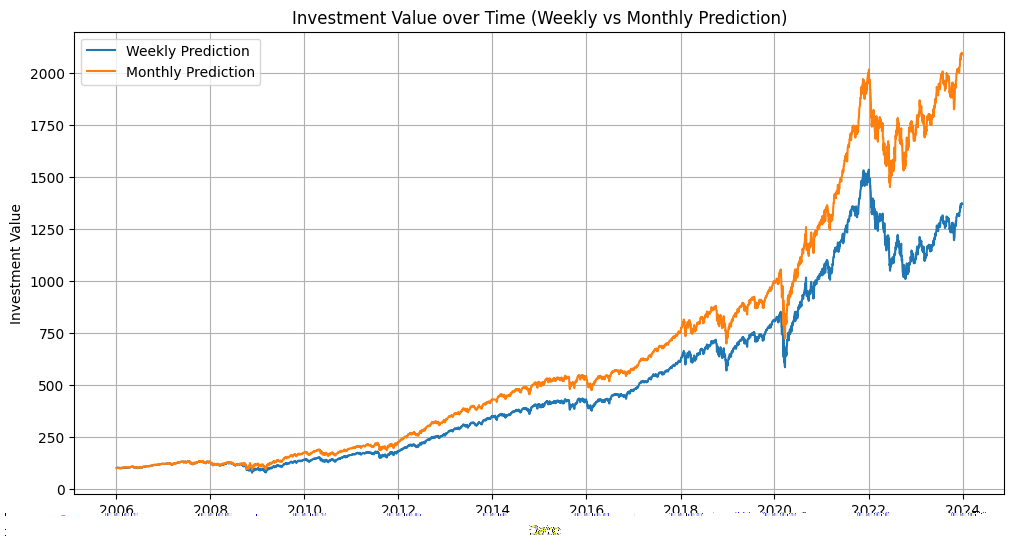

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取已经生成的数据
file_path_week = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_week).xlsx'
file_path_month = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_month).xlsx'

# 加载数据
week_data = pd.read_excel(file_path_week)
month_data = pd.read_excel(file_path_month)

# 移动日期到周末和月末
week_data['Date'] = pd.to_datetime(week_data['Date'])
month_data['Date'] = pd.to_datetime(month_data['Date'])

# 绘制图表
plt.figure(figsize=(12, 6))
plt.plot(week_data['Date'], week_data['Investment_Value'], label='Weekly Prediction')
plt.plot(month_data['Date'], month_data['Investment_Value'], label='Monthly Prediction')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.title('Investment Value over Time (Weekly vs Monthly Prediction)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def analyze_investment_strategy(dates, values):
    # 转换日期和价值为DataFrame
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)

    # 按年分组处理数据
    grouped = df.resample('Y')

    # 初始化存储结果的字典
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year

        # 提取每年最后一个有效值
        year_end_values[year] = group.iloc[-1]['value']

        # 计算每日收益率
        daily_returns = empyrical.simple_returns(group['value'])

        # 计算最大回撤
        annual_max_drawdowns[year] = empyrical.max_drawdown(daily_returns)

    return year_end_values, annual_max_drawdowns

In [ ]:
# 假设dates, dates_1, dates_2, valid_dates等变量已经被定义和赋值
# 假设values, values_1, values_2, sp500_values等变量也已经被定义和赋值

strategies_data = {
    'S&P500': (valid_dates, sp500_values),
    'Buy-Hold Growth': (buy_hold_dates, buy_hold_growth_values),
    'Buy-Hold Value': (buy_hold_dates, buy_hold_value_values),
    '5yr': (dates, values),
    '3yr': (dates_2, values_2),
    '1yr': (dates_1, values_1),
    'Inertia': (inertia_dates, inertia_values),
    'Anti-Inertia': (anti_inertia_dates, anti_inertia_values)
}


results = {}

for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    results[strategy_name] = {
        'year_end_values': year_end_values,
        'max_drawdowns': annual_max_drawdowns
    }


In [ ]:
years = np.arange(2006, 2024)
year_end_values_data = {strategy: [results[strategy]['year_end_values'].get(year) for year in years] for strategy in strategies_data.keys()}
max_drawdowns_data = {strategy: [results[strategy]['max_drawdowns'].get(year) for year in years] for strategy in strategies_data.keys()}


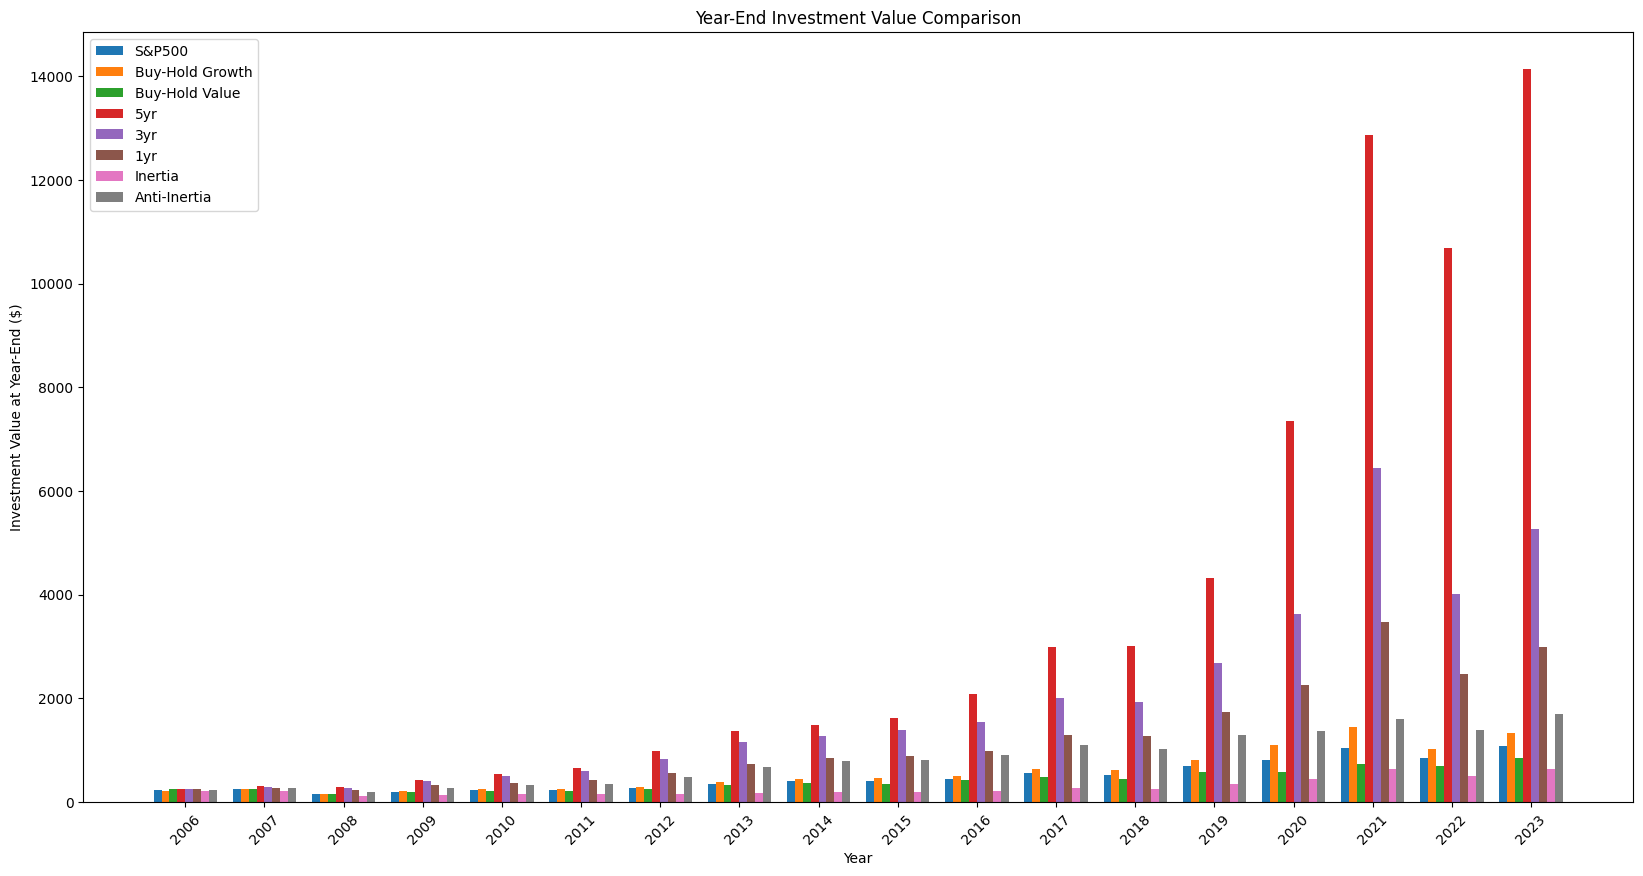

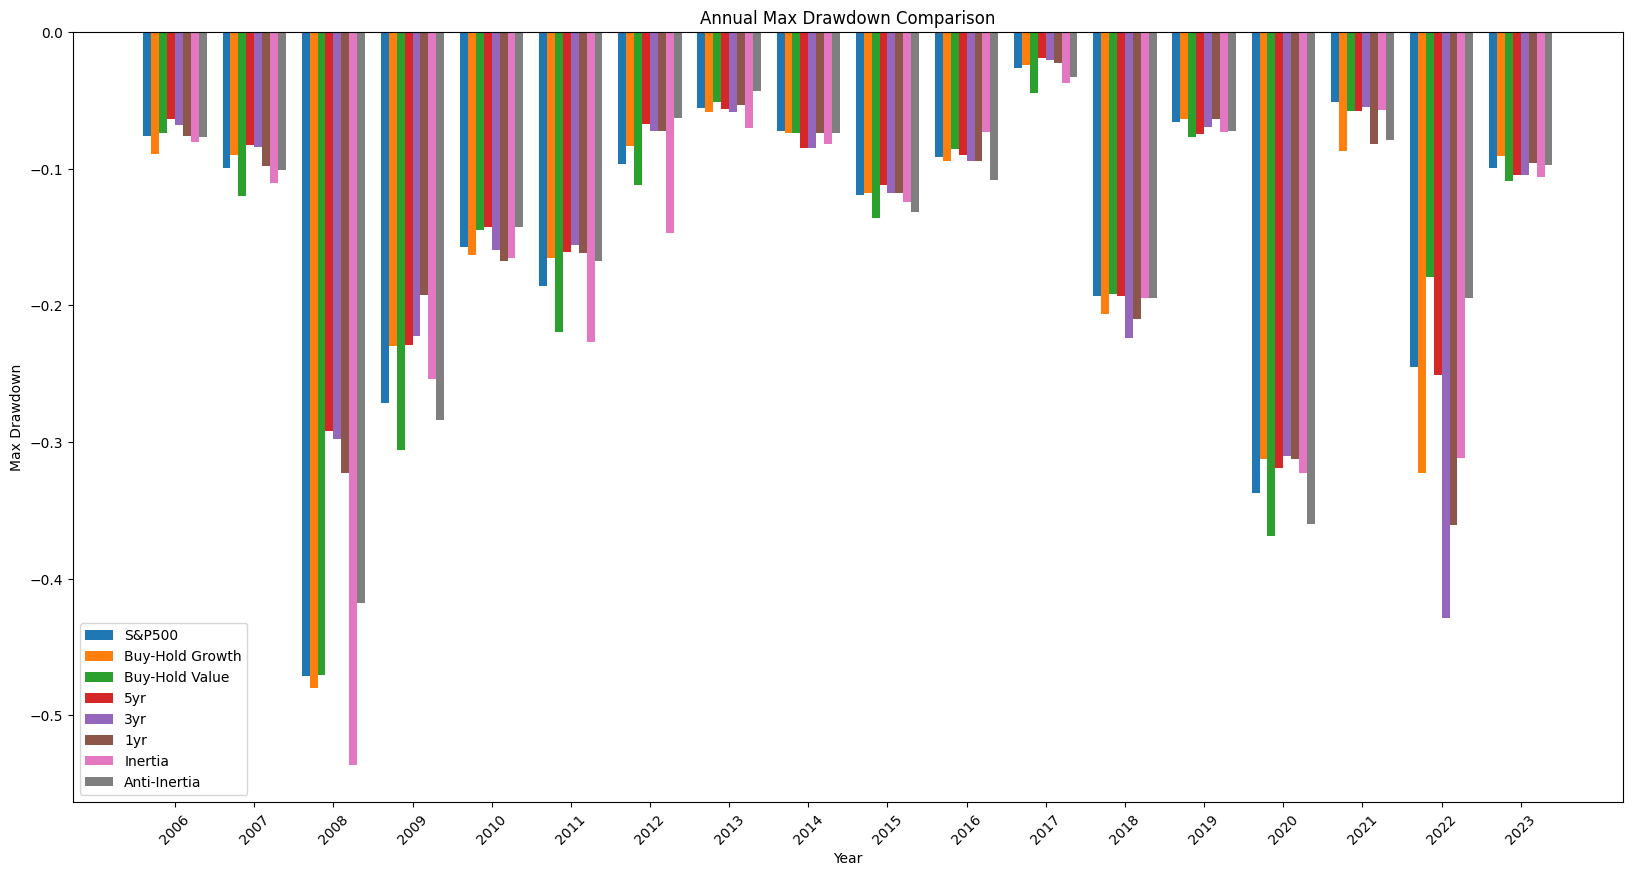

In [ ]:
plt.figure(figsize=(20, 10))
bar_width = 0.1
r = np.arange(len(years))

# 年末投资价值柱状图
for i, strategy in enumerate(strategies_data.keys()):
    plt.bar(r + i*bar_width, year_end_values_data[strategy], width=bar_width, label=strategy)

plt.xlabel('Year')
plt.ylabel('Investment Value at Year-End ($)')
plt.title('Year-End Investment Value Comparison')
plt.xticks(r + bar_width * (len(strategies_data) - 1) / 2, years)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 最大回撤柱状图
plt.figure(figsize=(20, 10))

for i, strategy in enumerate(strategies_data.keys()):
    plt.bar(r + i*bar_width, max_drawdowns_data[strategy], width=bar_width, label=strategy)

plt.xlabel('Year')
plt.ylabel('Max Drawdown')
plt.title('Annual Max Drawdown Comparison')
plt.xticks(r + bar_width * (len(strategies_data) - 1) / 2, years)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import csv

# 假设results字典已经按照上述逻辑填充完毕
# 示例中的results变量仅为展示目的，实际使用时应用你的逻辑生成的results字典

# 指定要写入的CSV文件名
filename = 'investment_strategies_results.csv'

# CSV文件的头部
headers = ['Strategy Name', 'Year End Values', 'Max Drawdowns']

# 写入CSV文件
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # 写入头部
    writer.writerow(headers)

    # 遍历results字典，将每个策略的结果写入CSV文件
    for strategy_name, metrics in results.items():
        # 从metrics字典中提取年终价值和最大回撤值
        year_end_values = metrics['year_end_values']
        max_drawdowns = metrics['max_drawdowns']
        # 写入当前策略的结果
        writer.writerow([strategy_name, year_end_values, max_drawdowns])

print(f'Results saved to {filename}')


Results saved to investment_strategies_results.csv


In [ ]:
import csv

# 指定两个文件名
filename_values = 'year_end_values.csv'
filename_drawdowns = 'max_drawdowns.csv'

# CSV文件的头部
headers_values = ['Strategy Name'] + sorted(list(next(iter(results.values()))['year_end_values'].keys()))
headers_drawdowns = ['Strategy Name'] + sorted(list(next(iter(results.values()))['max_drawdowns'].keys()))

# 写入年终价值CSV
with open(filename_values, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers_values)
    for strategy_name, metrics in results.items():
        row = [strategy_name] + [metrics['year_end_values'][year] for year in sorted(metrics['year_end_values'])]
        writer.writerow(row)

# 写入最大回撤CSV
with open(filename_drawdowns, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers_drawdowns)
    for strategy_name, metrics in results.items():
        row = [strategy_name] + [metrics['max_drawdowns'][year] for year in sorted(metrics['max_drawdowns'])]
        writer.writerow(row)

print(f'Year End Values saved to {filename_values}')
print(f'Max Drawdowns saved to {filename_drawdowns}')


Year End Values saved to year_end_values.csv
Max Drawdowns saved to max_drawdowns.csv


In [ ]:
# 计算每个策略每年的数据
# 假设你已经有了上述每个策略年末价值的字典

# 获取所有策略共有的年份
all_years = sorted(list(set(year_end_values_lstm.keys()) |
                        set(year_end_values_sp500.keys()) |
                        set(year_end_values_inertia.keys()) |
                        set(year_end_values_anti_inertia.keys()) |
                        set(year_end_values_buy_hold_growth.keys()) |
                        set(year_end_values_buy_hold_value.keys())))

# 准备每个策略每年的数据
year_end_values_lstm_5yr = extract_year_end_values(dates, values)  # 5年训练结果
year_end_values_lstm_3yr = extract_year_end_values(dates_2, values_2)  # 3年训练结果
year_end_values_lstm_1yr = extract_year_end_values(dates_1, values_1)  # 1年训练结果
values_sp500 = [year_end_values_sp500.get(year, np.nan) for year in all_years]
values_inertia = [year_end_values_inertia.get(year, np.nan) for year in all_years]
values_anti_inertia = [year_end_values_anti_inertia.get(year, np.nan) for year in all_years]
values_buy_hold_growth = [year_end_values_buy_hold_growth.get(year, np.nan) for year in all_years]
values_buy_hold_value = [year_end_values_buy_hold_value.get(year, np.nan) for year in all_years]

# 定义每个柱形的位置
bar_width = 0.1
r1 = np.arange(len(all_years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]

# 绘制柱形图
plt.figure(figsize=(20, 10))
plt.bar(r1, values_lstm_5yr, color='blue', width=bar_width, edgecolor='grey', label='LSTM Model (5 year training)')
plt.bar(r2, values_lstm_3yr, color='green', width=bar_width, edgecolor='grey', label='LSTM Model (3 year training)')
plt.bar(r3, values_lstm_1yr, color='purple', width=bar_width, edgecolor='grey', label='LSTM Model (1 year training)')
plt.bar(r4, values_sp500, color='red', width=bar_width, edgecolor='grey', label='S&P 500 Investment')
plt.bar(r5, values_inertia, color='cyan', width=bar_width, edgecolor='grey', label='Inertia Strategy')
plt.bar(r6, values_anti_inertia, color='magenta', width=bar_width, edgecolor='grey', label='Anti-Inertia Strategy')
plt.bar(r7, values_buy_hold_growth, color='darkgreen', width=bar_width, edgecolor='grey', label='Buy and Hold SPY Growth')
plt.bar(r8, values_buy_hold_value, color='brown', width=bar_width, edgecolor='grey', label='Buy and Hold SPY Value')

# 添加标签和标题
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Investment Value ($)', fontweight='bold')
plt.xticks([r + bar_width*3.5 for r in range(len(all_years))], all_years)

plt.title('Annual Performance of Investment Strategies')
plt.legend()
plt.show()


NameError: name 'year_end_values_lstm' is not defined

In [ ]:
import pandas as pd

# File paths
file_path_5_years = '/content/drive/MyDrive/research/investment_results_final(2006)(5 years).csv'
file_path_1_year = '/content/drive/MyDrive/research/investment_results_final(2006)(1 years).csv'
file_path_3_years = '/content/drive/MyDrive/research/investment_results_final(2006)(3 years).csv'

# Load data
results_df_5_years = pd.read_csv(file_path_5_years)
results_df_1_year = pd.read_csv(file_path_1_year)
results_df_3_years = pd.read_csv(file_path_3_years)

# Divide the investment values by 2
results_df_5_years['Investment_Value'] = results_df_5_years['Investment_Value'] / 2
results_df_1_year['Investment_Value'] = results_df_1_year['Investment_Value'] / 2
results_df_3_years['Investment_Value'] = results_df_3_years['Investment_Value'] / 2

# Write the modified data back to the CSV files
results_df_5_years.to_csv(file_path_5_years, index=False)
results_df_1_year.to_csv(file_path_1_year, index=False)
results_df_3_years.to_csv(file_path_3_years, index=False)

print("Values have been divided by 2 and saved back to the CSV files.")


Values have been divided by 2 and saved back to the CSV files.


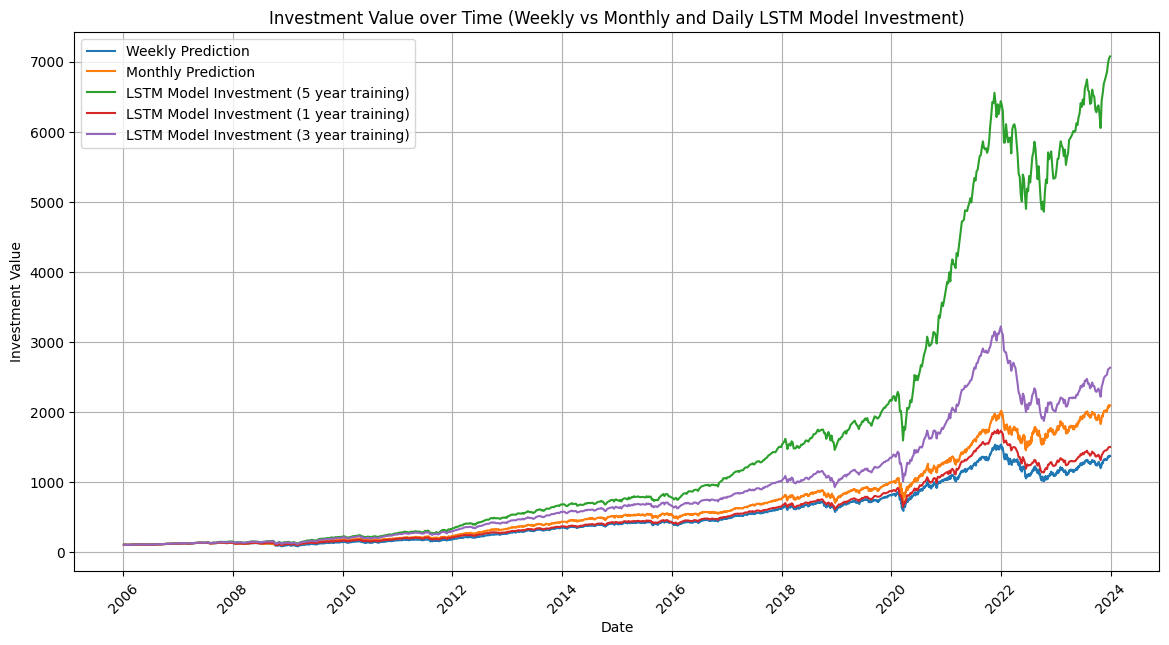

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load data
file_path_week = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_week).xlsx'
file_path_month = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_month).xlsx'
results_df = pd.read_csv('/content/drive/MyDrive/research/investment_results_final(2006)(5 years).csv')
file_path_1 = '/content/drive/MyDrive/research/investment_results_final(2006)(1 years).csv'
file_path_2 = '/content/drive/MyDrive/research/investment_results_final(2006)(3 years).csv'

# Load data into dataframes
week_data = pd.read_excel(file_path_week)
month_data = pd.read_excel(file_path_month)
investment_results_1 = pd.read_csv(file_path_1)
investment_results_2 = pd.read_csv(file_path_2)

# Convert 'Date' columns to datetime
week_data['Date'] = pd.to_datetime(week_data['Date'])
month_data['Date'] = pd.to_datetime(month_data['Date'])
results_df['Date'] = pd.to_datetime(results_df['Date'])
investment_results_1['Date'] = pd.to_datetime(investment_results_1['Date'])
investment_results_2['Date'] = pd.to_datetime(investment_results_2['Date'])

# Extract dates and values
dates = results_df['Date'].tolist()
values = results_df['Investment_Value'].tolist()
dates_1 = investment_results_1['Date'].tolist()
values_1 = investment_results_1['Investment_Value'].tolist()
dates_2 = investment_results_2['Date'].tolist()
values_2 = investment_results_2['Investment_Value'].tolist()

# Function to filter Fridays
def filter_fridays(dates, values):
    """筛选每周五的日期和对应的值"""
    friday_dates = [date for date in dates if date.weekday() == 4]
    friday_values = [value for date, value in zip(dates, values) if date.weekday() == 4]
    return friday_dates, friday_values

# Filter dates to Fridays for LSTM strategies
friday_dates, friday_values = filter_fridays(dates, values)
friday_dates_1, friday_values_1 = filter_fridays(dates_1, values_1)
friday_dates_2, friday_values_2 = filter_fridays(dates_2, values_2)

# Plot combined data
plt.figure(figsize=(14, 7))

# Weekly and Monthly Predictions
plt.plot(week_data['Date'], week_data['Investment_Value'], label='Weekly Prediction')
plt.plot(month_data['Date'], month_data['Investment_Value'], label='Monthly Prediction')

# LSTM Model Investments
plt.plot(friday_dates, friday_values, label='LSTM Model Investment (5 year training)')
plt.plot(friday_dates_1, friday_values_1, label='LSTM Model Investment (1 year training)')
plt.plot(friday_dates_2, friday_values_2, label='LSTM Model Investment (3 year training)')

# Formatting the plot
plt.title('Investment Value over Time (Weekly vs Monthly and Daily LSTM Model Investment)')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


In [ ]:
def analyze_investment_strategy(dates, values):
    # 转换日期和价值为DataFrame
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)

    # 按年分组处理数据
    grouped = df.resample('Y')

    # 初始化存储结果的字典
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year

        # 提取每年最后一个有效值
        year_end_values[year] = group.iloc[-1]['value']

        # 计算每日收益率
        daily_returns = empyrical.simple_returns(group['value'])

        # 计算最大回撤
        annual_max_drawdowns[year] = empyrical.max_drawdown(daily_returns)

    return year_end_values, annual_max_drawdowns

In [ ]:
import pandas as pd
import empyrical

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    # 转换日期和价值为DataFrame
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)

    # 按年分组处理数据
    grouped = df.resample('Y')

    # 初始化存储结果的字典
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year

        # 提取每年最后一个有效值
        year_end_values[year] = group.iloc[-1]['value']

        # 计算每日收益率
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)

        # 存储年化收益率和最大回撤
        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_returns, annual_max_drawdowns

# Load data
file_path_week = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_week).xlsx'
file_path_month = '/content/drive/MyDrive/research/investment_results_final(2006)(train_1 years_predict_1_month).xlsx'
results_df = pd.read_csv('/content/drive/MyDrive/research/investment_results_final(2006)(5 years).csv')
file_path_1 = '/content/drive/MyDrive/research/investment_results_final(2006)(1 years).csv'
file_path_2 = '/content/drive/MyDrive/research/investment_results_final(2006)(3 years).csv'

# Load data into dataframes
week_data = pd.read_excel(file_path_week)
month_data = pd.read_excel(file_path_month)
investment_results_1 = pd.read_csv(file_path_1)
investment_results_2 = pd.read_csv(file_path_2)

# Convert 'Date' columns to datetime
week_data['Date'] = pd.to_datetime(week_data['Date'])
month_data['Date'] = pd.to_datetime(month_data['Date'])
results_df['Date'] = pd.to_datetime(results_df['Date'])
investment_results_1['Date'] = pd.to_datetime(investment_results_1['Date'])
investment_results_2['Date'] = pd.to_datetime(investment_results_2['Date'])

# Extract dates and values
dates = results_df['Date'].tolist()
values = results_df['Investment_Value'].tolist()
dates_1 = investment_results_1['Date'].tolist()
values_1 = investment_results_1['Investment_Value'].tolist()
dates_2 = investment_results_2['Date'].tolist()
values_2 = investment_results_2['Investment_Value'].tolist()
dates_week = week_data['Date'].tolist()
values_week = week_data['Investment_Value'].tolist()
dates_month = month_data['Date'].tolist()
values_month = month_data['Investment_Value'].tolist()

# Strategies data dictionary
strategies_data = {
    '5yr': (dates, values),
    '3yr': (dates_2, values_2),
    '1yr': (dates_1, values_1),
    'weekly': (dates_week, values_week),
    'monthly': (dates_month, values_month),
}

# Initialize dataframes for results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)

    # Convert to DataFrames
    year_end_values_df = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    # Combine results into final DataFrames
    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Save results to CSV files
end_year_values_df.to_csv('end_year_values.csv')
annual_returns_df.to_csv('annual_returns.csv')
max_drawdowns_df.to_csv('max_drawdowns.csv')

print("Results have been saved to CSV files.")


    'Mon': pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week mon).xlsx'),
    'Tue': pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week tue).xlsx'),
    'Wed': pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week wed).xlsx'),
    'Thu': pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week thu).xlsx'),
    'Fri': pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week fri).xlsx')


Results have been saved to CSV files.


In [ ]:
import pandas as pd
import empyrical

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    # Convert dates and values to DataFrame
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)

    # Resample data annually
    grouped = df.resample('Y')

    # Initialize dictionaries to store results
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year

        # Extract the last value of each year
        year_end_values[year] = group.iloc[-1]['value']

        # Calculate daily returns
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)

        # Store annual return and max drawdown
        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_returns, annual_max_drawdowns

# Load new data
mon_data = pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week mon).xlsx')
tue_data = pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week tue).xlsx')
wed_data = pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week wed).xlsx')
thu_data = pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week thu).xlsx')
fri_data = pd.read_excel('/content/drive/MyDrive/research/investment_results_final(2006)(train_5 years_predict_1_week fri).xlsx')

# Convert 'Date' columns to datetime
mon_data['Date'] = pd.to_datetime(mon_data['Date'])
tue_data['Date'] = pd.to_datetime(tue_data['Date'])
wed_data['Date'] = pd.to_datetime(wed_data['Date'])
thu_data['Date'] = pd.to_datetime(thu_data['Date'])
fri_data['Date'] = pd.to_datetime(fri_data['Date'])

# Extract dates and values
dates_mon = mon_data['Date'].tolist()
values_mon = mon_data['Investment_Value'].tolist()
dates_tue = tue_data['Date'].tolist()
values_tue = tue_data['Investment_Value'].tolist()
dates_wed = wed_data['Date'].tolist()
values_wed = wed_data['Investment_Value'].tolist()
dates_thu = thu_data['Date'].tolist()
values_thu = thu_data['Investment_Value'].tolist()
dates_fri = fri_data['Date'].tolist()
values_fri = fri_data['Investment_Value'].tolist()

# Strategies data dictionary
strategies_data = {
    'Mon': (dates_mon, values_mon),
    'Tue': (dates_tue, values_tue),
    'Wed': (dates_wed, values_wed),
    'Thu': (dates_thu, values_thu),
    'Fri': (dates_fri, values_fri),
}

# Initialize dataframes for results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)

    # Convert to DataFrames
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    # Combine results into final DataFrames
    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Save results to CSV files
end_year_values_df.to_csv('end_year_values.csv')
annual_returns_df.to_csv('annual_returns.csv')
max_drawdowns_df.to_csv('max_drawdowns.csv')

print("Results have been saved to CSV files.")


Results have been saved to CSV files.
